<a href="https://colab.research.google.com/github/karolke99/nn_dl/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Assignment 2
Karol Waligora

In [1]:
!pip install tensorflow

In [85]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from IPython.display import Image
import seaborn as sns

In [86]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

## Data divided by digits

In [87]:
def split_data_by_digits(data, labels, range):
    return data[np.isin(labels, range)], labels[np.isin(labels, range)]

def visualize_samples(data, title):
    plt.figure(figsize=(10,2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(data[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


In [90]:
X_train_digits_0_2, y_train_digits_0_2 = split_data_by_digits(X_train, y_train, range(0,3))
X_train_digits_3_5, y_train_digits_3_5 = split_data_by_digits(X_train, y_train, range(3,6))
X_train_digits_6_9, y_train_digits_6_9 = split_data_by_digits(X_train, y_train, range(6,10))

X_test_digits_0_2, y_test_digits_0_2 = split_data_by_digits(X_test, y_test, range(0,3))
X_test_digits_3_5, y_test_digits_3_5 = split_data_by_digits(X_test, y_test, range(3,6))
X_test_digits_6_9, y_test_digits_6_9 = split_data_by_digits(X_test, y_test, range(6,10))

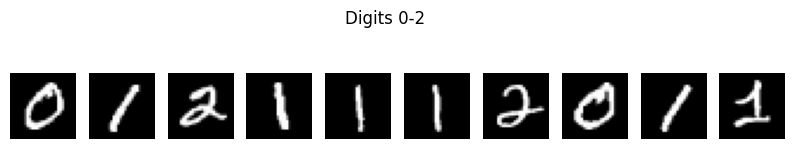

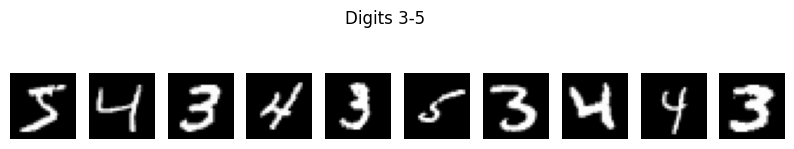

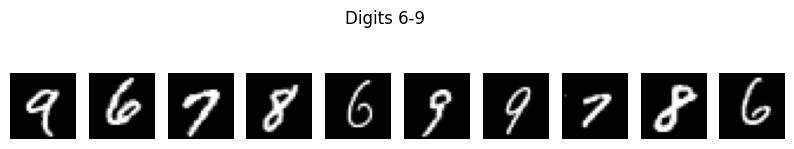

In [91]:
visualize_samples(X_train_digits_0_2, 'Digits 0-2')
visualize_samples(X_train_digits_3_5, 'Digits 3-5')
visualize_samples(X_train_digits_6_9, 'Digits 6-9')

In [92]:
def create_model():
    model = Sequential([
        # Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', input_shape=(28*28, )),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='sgd',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [93]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

### Model for 0-2 digits

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
466/466 [==============================] - 7s 4ms/step - loss: 0.2829 - accuracy: 0.9419 - val_loss: 0.0969 - val_accuracy: 0.9732
Epoch 2/10
466/466 [==============================] - 2s 3ms/step - loss: 0.0841 - accuracy: 0.9785 - val_loss: 0.0712 - val_accuracy: 0.9793
Epoch 3/10
466/466 [==============================] - 2s 3ms/step - loss: 0.0666 - accuracy: 0.9817 - val_loss: 0.0610 - val_acc

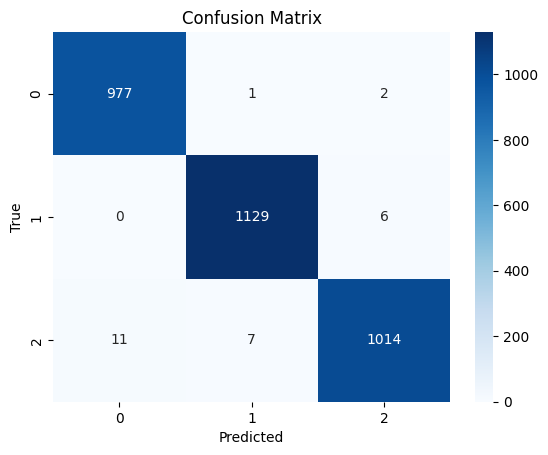

Precission score = 99.1428300940269 %
Recall score = 99.14204003813155 %


In [9]:
model_0_2 = create_model()
model_0_2.summary()
history = model_0_2.fit(X_train_digits_0_2,
              y_train_digits_0_2,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
res = model_0_2.evaluate(X_test_digits_0_2, y_test_digits_0_2)
y_pred = np.argmax(model_0_2.predict(X_test_digits_0_2), axis=1)
cm = confusion_matrix(y_test_digits_0_2, y_pred)
classes = np.unique(y_test_digits_0_2)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test_digits_0_2, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test_digits_0_2, y_pred, average="weighted"), 100)} %')

### Model for 3-5 digits

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
435/435 [==============================] - 3s 5ms/step - loss: 0.4428 - accuracy: 0.8852 - val_loss: 0.1957 - val_accuracy: 0.9428
Epoch 2/10
435/435 [==============================] - 2s 4ms/step - loss: 0.1711 - accuracy: 0.9487 - val_loss: 0.1471 - val_accuracy: 0.9557
Epoch 3/10
435/435 [==============================] - 1s 3ms/step - loss: 0.1358 - accuracy: 0.9559 - val_loss: 0.1274 - val_a

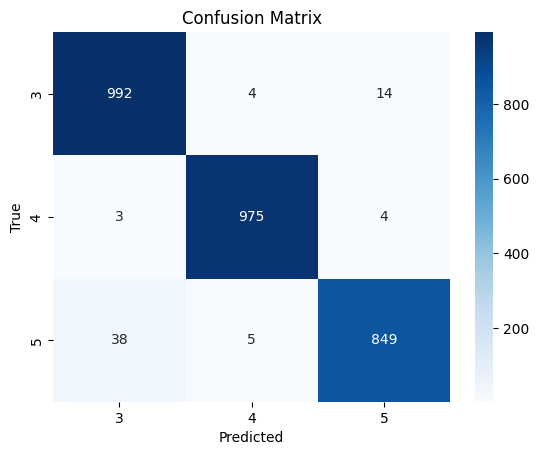

Precission score = 97.656454114496 %
Recall score = 97.64216366158114 %


In [10]:
model_3_5 = create_model()
model_3_5.summary()
model_3_5.fit(X_train_digits_3_5,
              y_train_digits_3_5,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
model_3_5.evaluate(X_test_digits_3_5, y_test_digits_3_5)
y_pred = np.argmax(model_3_5.predict(X_test_digits_3_5), axis=1)
cm = confusion_matrix(y_test_digits_3_5, y_pred)
classes = np.unique(y_test_digits_3_5)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test_digits_3_5, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test_digits_3_5, y_pred, average="weighted"), 100)} %')

### Model for 6-9 digits

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4322 - accuracy: 0.8989 - val_loss: 0.1994 - val_accuracy: 0.9452
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1856 - accuracy: 0.9445 - val_loss: 0.1602 - val_accuracy: 0.9521
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1560 - accuracy: 0.9515 - val_loss: 0.1423 - val_a

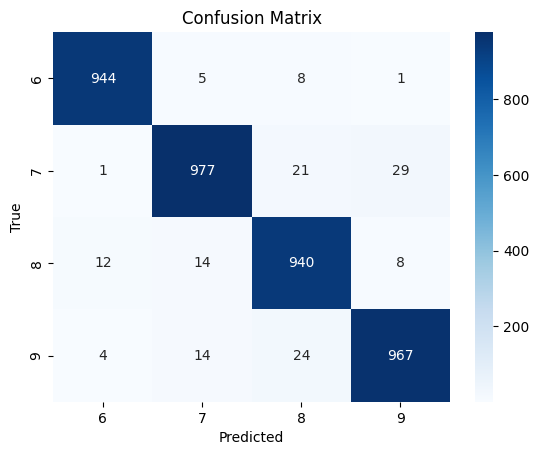

Precission score = 96.45572702990432 %
Recall score = 96.44746787603931 %


In [11]:
model_6_9 = create_model()
model_6_9.summary()
model_6_9.fit(X_train_digits_6_9,
              y_train_digits_6_9,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
model_6_9.evaluate(X_test_digits_6_9, y_test_digits_6_9)
y_pred = np.argmax(model_6_9.predict(X_test_digits_6_9), axis=1)
cm = confusion_matrix(y_test_digits_6_9, y_pred)
classes = np.unique(y_test_digits_6_9)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test_digits_6_9, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test_digits_6_9, y_pred, average="weighted"), 100)} %')

### Aggregate model

In [12]:
def aggregate_models(models):
    global_model = create_model()
    global_weights = global_model.get_weights()

    # Loop through each layer in the model, add the corresponding weights form local to global model
    for local_model in models:
        local_weights = local_model.get_weights()
        global_weights = [np.add(global_w, local_w) for global_w, local_w in zip(global_weights, local_weights)]

    # Get average weights
    global_weights = [np.divide(w, len(models)) for w in global_weights]
    global_model.set_weights(global_weights)

    return global_model

In [13]:
global_model = aggregate_models([model_0_2, model_3_5, model_6_9])

313/313 [==============================] - 1s 2ms/step


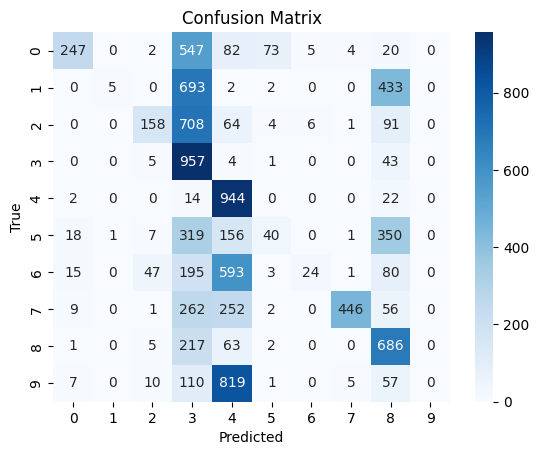

Precission score = 53.01013074474275 %
Recall score = 35.07 %


In [14]:
global_model.evaluate(X_test, y_test)
y_pred = np.argmax(global_model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted", zero_division=0), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

Local models have pretty good evaluation scores, however the global model does not perform so well. Confusion matrix does not look as for a good model, especially for digits 3 and 4. High value of loss and low value of accuracy, precision score and recall score suggest that this model is rather weak.

## Data divided by rows

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [57]:
def split_data_horizontally(data, labels, num_subsets):
    num_samples, num_rows = data.shape

    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    samples_per_subset = num_samples // num_subsets

    local_datasets = []

    for i in range(num_subsets):
        sample_range = indices[i * samples_per_subset : (i + 1) * samples_per_subset]
        local_data = data[sample_range]
        local_labels = labels[sample_range]
        local_datasets.append((local_data, local_labels))

    return local_datasets

In [58]:
num_local_datasets = 3
local_datasets = split_data_horizontally(X_train, y_train, num_local_datasets)


In [94]:
X_train_1, y_train_1 = local_datasets[0]
X_train_2, y_train_2 = local_datasets[1]
X_train_3, y_train_3 = local_datasets[2]

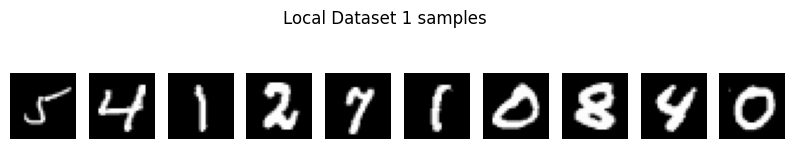

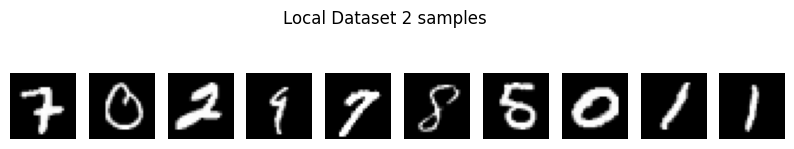

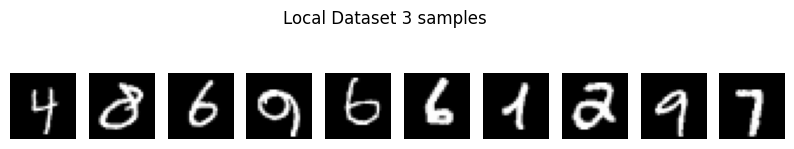

In [97]:
visualize_samples(X_train_1, "Local Dataset 1 samples")
visualize_samples(X_train_2, "Local Dataset 2 samples")
visualize_samples(X_train_3, "Local Dataset 3 samples")

### Model 1

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 4s 7ms/step - loss: 1.1755 - accuracy: 0.7210 - val_loss: 0.6570 - val_accuracy: 0.8462
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5311 - accuracy: 0.8698 - val_loss: 0.4695 - val_accuracy: 0.8767
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4214 - accuracy: 0.8891 - val_loss: 0.4041 - val_a

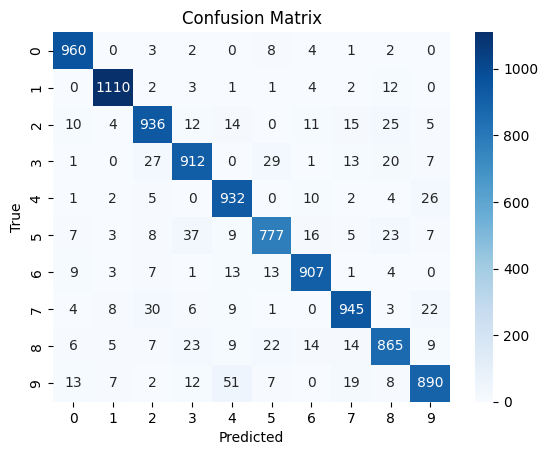

Precission score = 92.33195536111583 %
Recall score = 92.34 %


In [98]:
model_1 = create_model()
model_1.summary()
model_1.fit(X_train_1,
              y_train_1,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
res = model_1.evaluate(X_test, y_test)
y_pred = np.argmax(model_1.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

### Model 2

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 4s 6ms/step - loss: 1.1511 - accuracy: 0.7221 - val_loss: 0.6577 - val_accuracy: 0.8457
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5464 - accuracy: 0.8621 - val_loss: 0.4802 - val_accuracy: 0.8785
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4397 - accuracy: 0.8805 - val_loss: 0.4182 - val_a

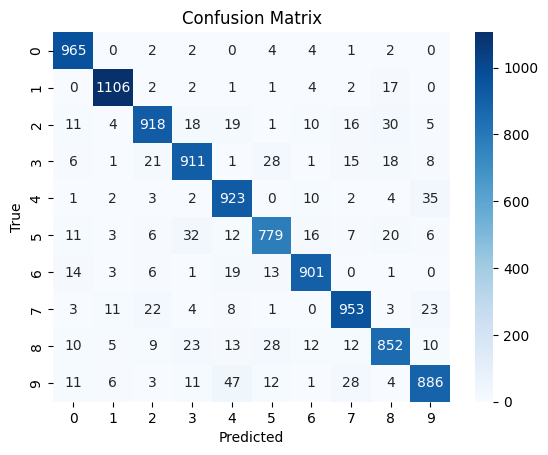

Precission score = 91.93767318560894 %
Recall score = 91.94 %


In [99]:
model_2 = create_model()
model_2.summary()
model_2.fit(X_train_2,
              y_train_2,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
res = model_2.evaluate(X_test, y_test)
y_pred = np.argmax(model_2.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

### Model 3

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 4s 6ms/step - loss: 1.1557 - accuracy: 0.7244 - val_loss: 0.6339 - val_accuracy: 0.8505
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.5275 - accuracy: 0.8679 - val_loss: 0.4634 - val_accuracy: 0.8798
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4225 - accuracy: 0.8879 - val_loss: 0.3987 - val_a

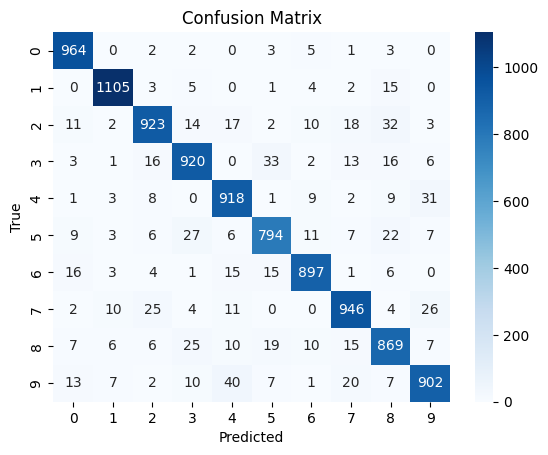

Precission score = 92.38034391895235 %
Recall score = 92.38 %


In [100]:
model_3 = create_model()
model_3.summary()
model_3.fit(X_train_3,
              y_train_3,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
res = model_3.evaluate(X_test, y_test)
y_pred = np.argmax(model_3.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

### Aggregate model

In [101]:
global_model = aggregate_models([model_1, model_2, model_3])

313/313 [==============================] - 1s 4ms/step


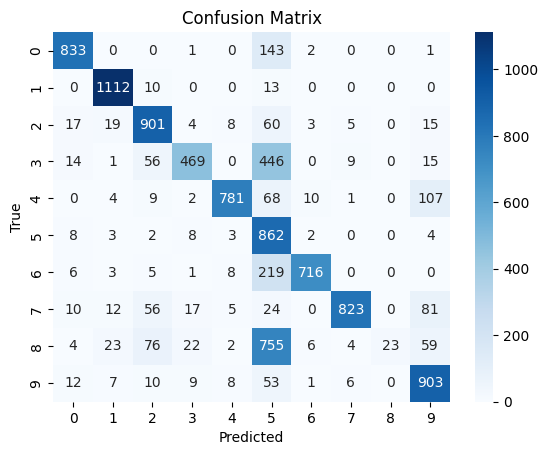

Precission score = 85.83712961428671 %
Recall score = 74.22999999999999 %


In [102]:
global_model.evaluate(X_test, y_test)
y_pred = np.argmax(global_model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted", zero_division=0), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

In this case the evaluation scores are way better than in splitting dataset by digits. The confusion matrix look much more like for well-fitted model, however there are some mistakes, especially in recognition of digit 5 and 8. An interesting fact is that the value of loss is rather high, while the accuracy is satisfactory.

## Model trained on full dataset

In [103]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7320 - accuracy: 0.8192 - val_loss: 0.3807 - val_accuracy: 0.8976
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3629 - accuracy: 0.9005 - val_loss: 0.3103 - val_accuracy: 0.9137
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3095 - accuracy: 0.9139 - val_loss: 0.2772 

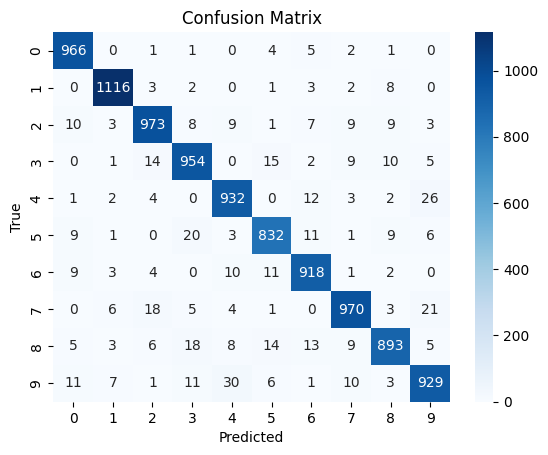

Precission score = 94.82801063062011 %
Recall score = 94.83 %


In [106]:
model = create_model()
model.summary()
model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2,
          shuffle=True,
          verbose=1,
          callbacks=[early_stopping]
          )
res = model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

Model trained on full dataset turned out to have the best fit. Metrics value are satisfactory - loss value is low, while the accuracy value is pretty high. Similarly, the precision and recall scores are good.

To sum up, splitting models might be an interesting apporach however in this case, when the same simple neural networks were used, the best results were achived in case when model was trained on full dataset. Perhaps, a better adjustment of parameters and layers of NN could improve the accuracy of the approach in which dataset is splitted.